## Imports

In [579]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Generating Datasets + train test split (20%)

In [580]:
# generate dataset 1
X1, y1 = make_classification(n_samples=5000, n_features=15, n_informative=12, n_redundant=2, random_state=42)

print(f"Shape of Dataset1 instances: {X1.shape}")
print(f"Shape of Dataset1 labels: {y1.shape}")

# split dataset 1 into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# generate dataset 2
X2, y2 = make_classification(n_samples=100000, n_features=50, n_informative=40, n_redundant=7, random_state=42)

print(f"Shape of Dataset2 instances: {X2.shape}")
print(f"Shape of Dataset2 labels: {y2.shape}")

# split dataset 2 into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

Shape of Dataset1 instances: (5000, 15)
Shape of Dataset1 labels: (5000,)
Shape of Dataset2 instances: (100000, 50)
Shape of Dataset2 labels: (100000,)


### Visualizing data

In [3]:
def plot_2d(X_pca, y, title):
    # plot the first two principal components
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(title)
    plt.show()

In [4]:
def plot_3d(X_pca, y, title):
    # Create a 3D scatter plot of the first three principal components
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(211, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = y)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(title)

    plt.subplots_adjust(left=-1, right=2, bottom=-1, top=2)

    plt.show()

In [33]:
df = pd.DataFrame(X1)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.458438,-0.404514,0.634402,-0.846226,-1.076876,2.674189,-0.443571,2.308202,-7.126122,-0.069997,0.717954,2.419016,-1.665220,1.514990,1.327924
1,8.255481,-3.187070,-3.240880,3.347427,3.788003,3.024897,-2.235452,-3.761701,-1.517476,3.680107,-1.040692,2.194224,4.308063,0.493790,-1.391815
2,2.666468,2.704778,-1.528261,-1.659007,-0.192410,2.650030,-1.474588,0.254437,-0.177275,0.556829,1.285773,-0.218337,-3.883594,1.370641,0.237427
3,4.191265,1.563323,2.641812,-1.976014,0.778463,-2.044405,0.693027,0.295970,-4.919504,3.024986,3.010802,4.114647,-6.392290,-0.202518,-2.905653
4,5.662689,1.429042,-1.255170,-0.165240,1.901870,0.623582,0.286068,-0.094487,-5.087277,4.647909,-1.575993,0.884850,1.904976,-0.114986,0.881168


In [34]:
df = pd.DataFrame(X2)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,3.557450,-1.542545,0.252954,-4.052947,-1.026072,5.703566,0.797148,-3.363798,8.226548,-1.340656,...,0.907889,-2.737108,4.655978,-0.762935,2.343578,-0.347289,-1.194962,-2.264457,3.611036,1.482397
1,-2.651416,-7.188445,-0.832654,7.340322,0.484132,-0.914423,0.572067,5.972338,-7.111156,2.926595,...,-2.618655,-1.831141,-0.030301,2.865109,-4.650892,-1.963960,4.947103,0.631550,3.941149,1.363843
2,3.493897,-10.976139,2.951041,7.790465,0.304325,-0.486635,0.985816,-3.343362,28.069202,1.100117,...,3.764409,-2.799439,2.779383,-4.928824,-1.364154,-5.280407,1.876862,3.078670,-6.395297,2.756078
3,-1.962738,-19.174747,3.293586,-15.955337,-0.332018,-0.164353,0.344132,2.458018,-5.700549,6.671695,...,-2.719238,-10.009612,-3.170661,7.963061,-1.251997,4.925068,-0.531954,0.787610,2.012607,-4.209082
4,3.070536,-2.136721,-3.715962,5.901959,-8.104621,4.367954,0.404935,0.139121,-8.099365,2.537103,...,-0.230495,-0.078572,0.004941,3.843370,-5.008233,-7.944096,-0.815216,1.201142,10.368492,-3.195998


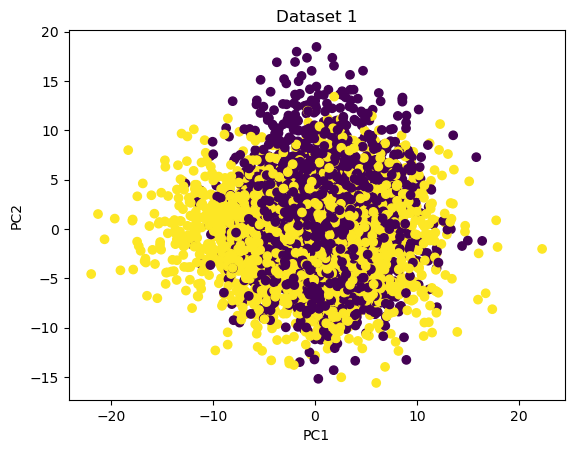

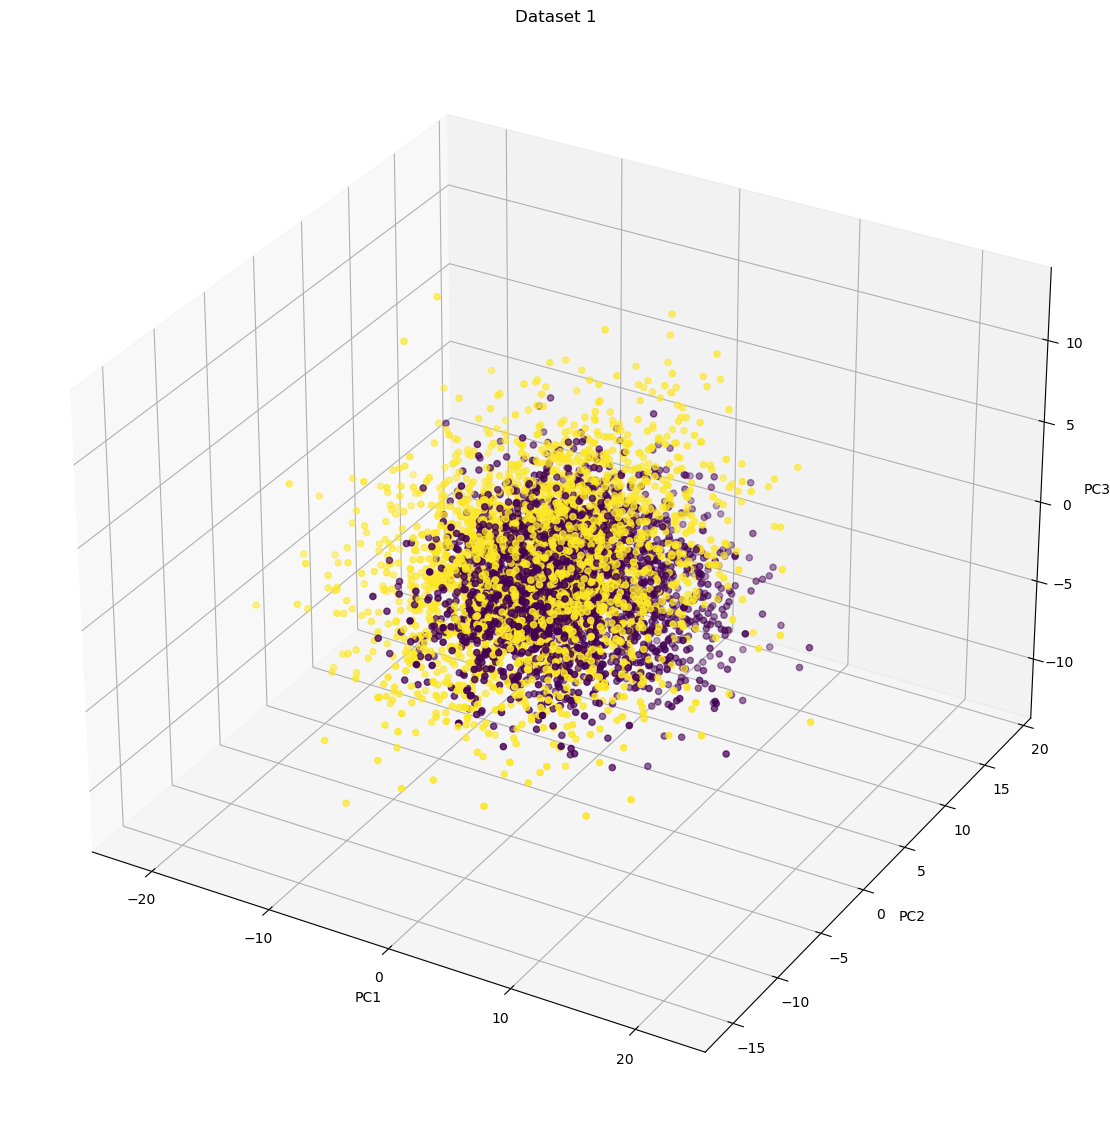

In [5]:
# perform PCA on dataset 1
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)

# plot the first two principal components
plot_2d(X1_pca,y1,'Dataset 1')

# perform PCA on dataset 1
pca = PCA(n_components=3)
X1_pca = pca.fit_transform(X1)

# plot the first three principal components
plot_3d(X1_pca,y1,'Dataset 1')

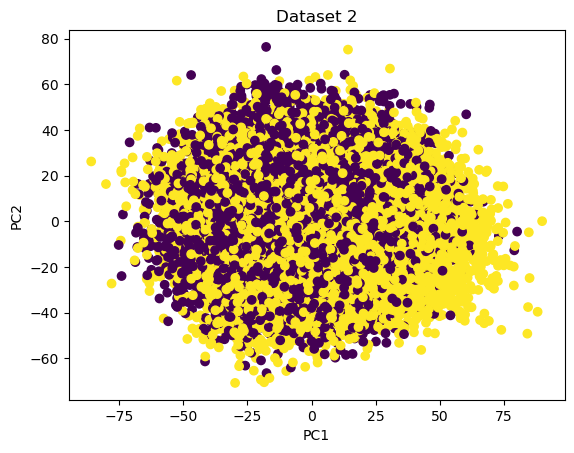

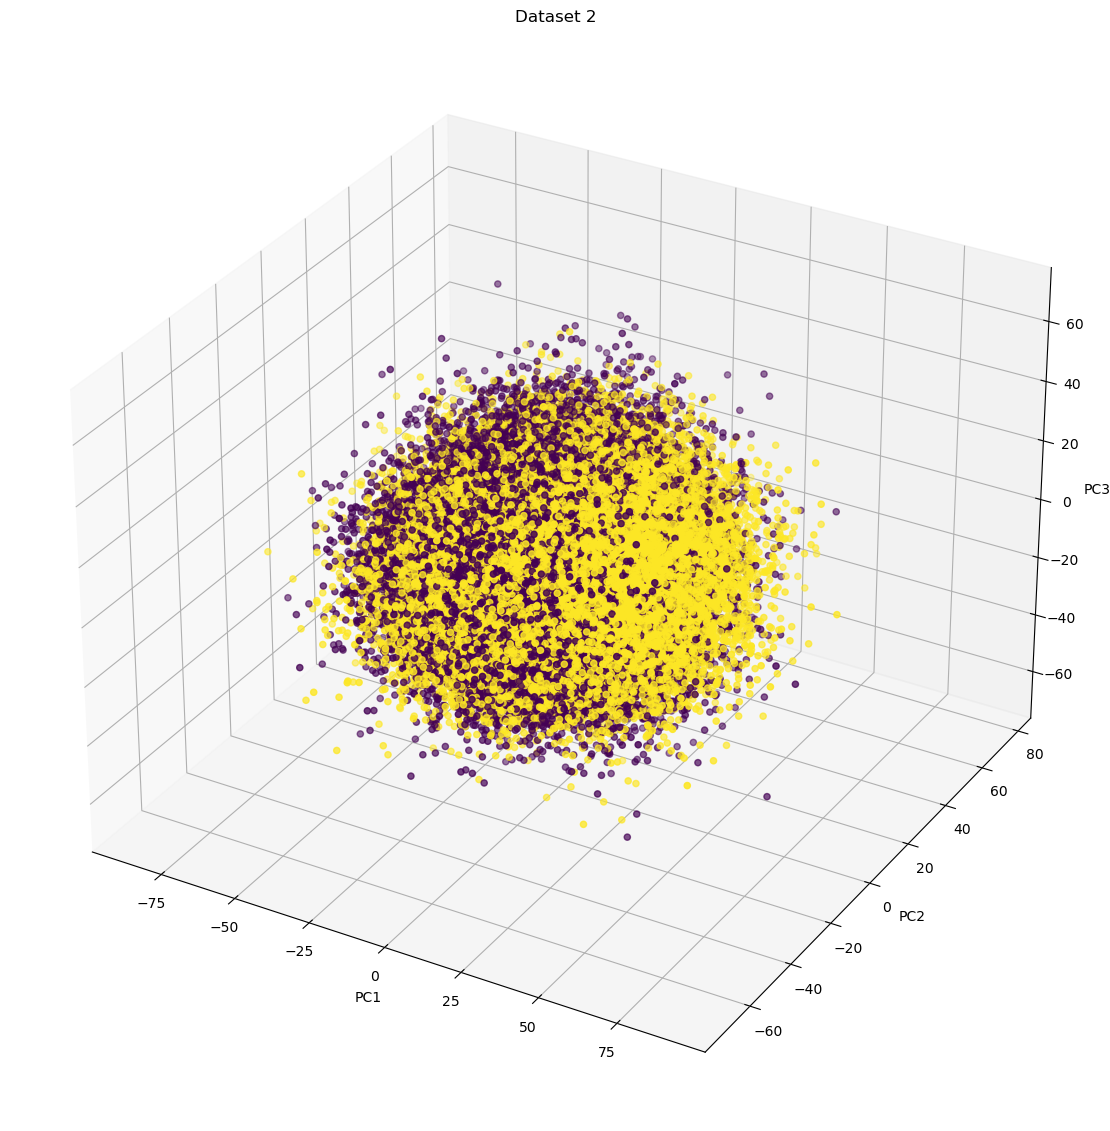

In [6]:
# perform PCA on dataset 2
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2)

# plot the first two principal components
plot_2d(X2_pca,y2,'Dataset 2')

# perform PCA on dataset 2
pca = PCA(n_components=3)
X2_pca = pca.fit_transform(X2)

# plot the first three principal components
plot_3d(X2_pca,y2,'Dataset 2')

## Part 1: Gradient Boosting Regression Trees (GBRT)

In [4]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [5]:
def calculate_residuals(y_true, y_pred):
    return y_true - y_pred

In [6]:
def create_weak_regressor(X, y, max_depth):
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    model.fit(X, y)
    return model

In [7]:
def gbrt_predict(X, models, learning_rate):
    y_pred = np.zeros(X.shape[0])
    for model in models:
        y_pred += learning_rate * model.predict(X)
    return y_pred

In the below "fit", each iteration a model - weak learner is appended to the ensemble (namely h is added to H), and y_pred (used for residuals) which is used for residuals is updated with said model/h, without considering argmin - this seems to work

For future reference, lets denote this by fit_1

In [8]:
# This version works well but is not in use as to implement argmin
def gbrt_fit(X, y, n_estimators, max_depth, learning_rate): # this version works well
    models = []
    y_pred = np.full(y.shape[0],np.mean(y))
    for i in range(n_estimators):
        residuals = calculate_residuals(y, y_pred)
        model = create_weak_regressor(X, residuals, max_depth)
        models.append(model)
        y_pred += learning_rate * model.predict(X) # this is for residuals namely yi - H(xi)
    return models

In the below "fit", each iteration the model - weak learner that minimizes (h(xi)-ti)^2 is appended to the ensemble (namely h that minimizes said equation is added to H), and y_pred (used for residuals) is updated with said model/h (times learning rate) - the model/h 

For future reference, lets denote this by fit_2

In [9]:
# Version including the argmin h in H
def gbrt_fit_argmin(X, y, n_estimators, max_depth, learning_rate):
    models = []
    y_pred = np.full(y.shape[0],np.mean(y))
    for i in range(n_estimators):
        residuals = calculate_residuals(y, y_pred)
        model = create_weak_regressor(X, residuals, max_depth)
        
        # find argmin h in H
        current_argmin = model
        current_minval = (model.predict(X) - residuals)**2
        for model_ in models:
            val = (model.predict(X) - residuals)**2
            if np.mean(val) < np.mean(current_minval):
                current_minval = val
                current_argmin = model_
        
        models.append(current_argmin)
        y_pred += learning_rate * current_argmin.predict(X) # this is for residuals namely yi - H(xi)
    return models

In the below "fit", each iteration a model - weak learner is appended to the ensemble (namely h is added to H), and y_pred (used for residuals) is updated with the argmin model/h (times learning rate) - the model/h that minimizes (h(xi)-ti)^2 - this version works

Note that this version is used in the below cell (it behaves pretty much the same as the above version)

For future reference, lets denote this by fit_3

In [10]:
# Version including the argmin h in H
def gbrt_fit_argmin_(X, y, n_estimators, max_depth, learning_rate):
    models = []
    y_pred = np.full(y.shape[0],np.mean(y))
    for i in range(n_estimators):
        residuals = calculate_residuals(y, y_pred)
        model = create_weak_regressor(X, residuals, max_depth)
        models.append(model)
        
        # find argmin h in H
        current_argmin = model
        current_minval = (model.predict(X) - residuals)**2
        for model_ in models:
            val = (model.predict(X) - residuals)**2
            if np.mean(val) < np.mean(current_minval):
                current_minval = val
                current_argmin = model_
        
        y_pred += learning_rate * current_argmin.predict(X) # this is for residuals namely yi - H(xi)
    return models

In [50]:
# fit GBRT model to dataset 1
models1 = gbrt_fit_argmin_(X1_train, y1_train, n_estimators=100, max_depth=2, learning_rate=0.1)


# predict on test set
y1_pred = gbrt_predict(X1_test, models1, learning_rate=0.1)

y1_pred_binary = np.where(y1_pred > 0, 1, 0)
print('dataset 1')
print("Test group classification report")
print(classification_report(y1_test,y1_pred_binary))
# calculate MSE
mse1 = mse_loss(y1_test, y1_pred)
print("Test group - MSE on dataset 1:", mse1)

dataset 1
Test group classification report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       495
           1       0.92      0.83      0.87       505

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.87      1000
weighted avg       0.88      0.88      0.87      1000

Test group - MSE on dataset 1: 0.3750924011076795


In [51]:
# fit GBRT model to dataset 2
models2 = gbrt_fit_argmin_(X2_train, y2_train, n_estimators=100, max_depth=2, learning_rate=0.1)

# predict on test set
y2_pred = gbrt_predict(X2_test, models2, learning_rate=0.1)

# calculate MSE
mse2 = mse_loss(y2_test, y2_pred)
y2_pred_binary = np.where(y2_pred > 0, 1, 0)
print('dataset 2')
print("Test group classification report")
print(classification_report(y2_test,y2_pred_binary))
print("Test group - MSE on dataset 2:", mse2)

dataset 2
Test group classification report
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      9956
           1       0.85      0.85      0.85     10044

    accuracy                           0.85     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.85      0.85      0.85     20000

Test group - MSE on dataset 2: 0.376867732892907


## Number of weak learners effect on performance

Dataset 1
n_estimators: 2
Test group classification report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       495
           1       0.73      0.73      0.73       505

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000

n_estimators: 10
Test group classification report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       495
           1       0.80      0.76      0.78       505

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.78      0.78      0.78      1000

n_estimators: 25
Test group classification report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       495
           1       0.86      0.79      0.82       505

    accuracy           

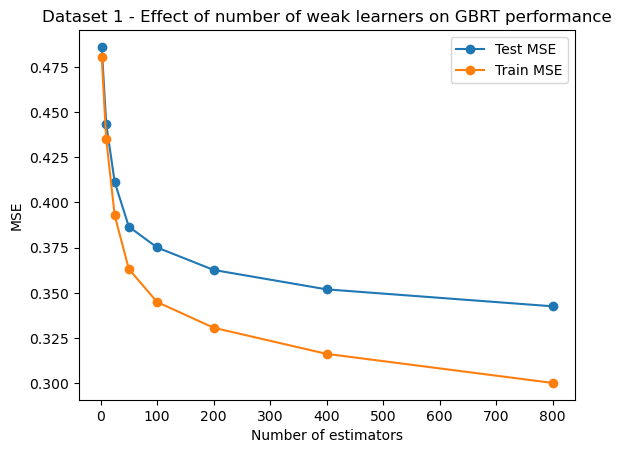

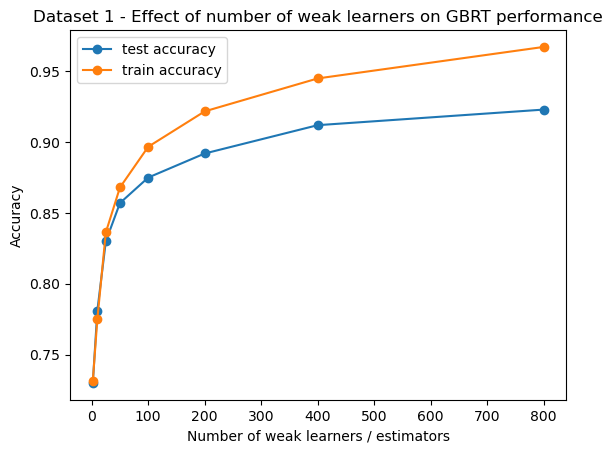

In [53]:
n_estimators_list = [2, 10, 25, 50, 100, 200, 400, 800]
mse_list = []
train_mse = []
test_acc = []
train_acc = []

print("Dataset 1")
for n_estimators in n_estimators_list:
    # fit GBRT model to dataset 1
    models1 = gbrt_fit_argmin_(X1_train, y1_train, n_estimators=n_estimators, max_depth=2, learning_rate=0.1)

    # predict on test set
    y1_pred = gbrt_predict(X1_test, models1, learning_rate=0.1)
    y1_train_pred = gbrt_predict(X1_train, models1, learning_rate=0.1)
    y1_train_pred_binary = np.where(y1_train_pred > 0, 1, 0)
    
    print(f"n_estimators: {n_estimators}")
    y1_pred_binary = np.where(y1_pred > 0, 1, 0)
    print("Test group classification report")
    print(classification_report(y1_test,y1_pred_binary))

    # calculate MSE
    mse = mse_loss(y1_test, y1_pred)
    mse_list.append(mse)
    mse = mse_loss(y1_train, gbrt_predict(X1_train, models1, learning_rate=0.1))
    train_mse.append(mse)
    
    test_accuracy = accuracy_score(y1_test, y1_pred_binary)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y1_train, y1_train_pred_binary)
    train_acc.append(train_accuracy)

# plot results
plt.plot(n_estimators_list, mse_list, label = "Test MSE", marker = 'o')
plt.plot(n_estimators_list, train_mse, label = "Train MSE", marker = 'o')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('MSE')
plt.title('Dataset 1 - Effect of number of weak learners on GBRT performance')
plt.show()

# plot results
plt.plot(n_estimators_list, test_acc, label = "test accuracy", marker = 'o')
plt.plot(n_estimators_list, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('Number of weak learners / estimators')
plt.ylabel('Accuracy')
plt.title('Dataset 1 - Effect of number of weak learners on GBRT performance')
plt.show()

Dataset 2
n_estimators: 2
Test group classification report
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      9956
           1       0.68      0.77      0.72     10044

    accuracy                           0.70     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.70      0.70      0.70     20000

n_estimators: 10
Test group classification report
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      9956
           1       0.75      0.74      0.74     10044

    accuracy                           0.75     20000
   macro avg       0.75      0.75      0.75     20000
weighted avg       0.75      0.75      0.75     20000

n_estimators: 25
Test group classification report
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      9956
           1       0.79      0.78      0.78     10044

    accuracy           

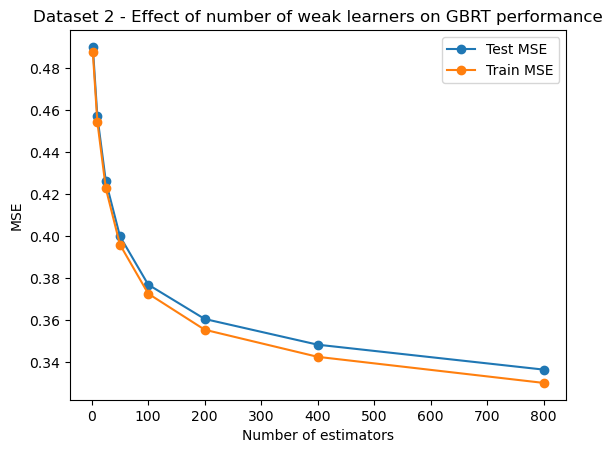

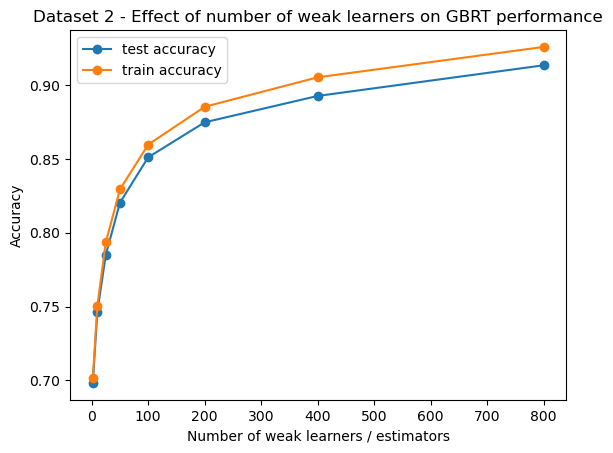

In [54]:
n_estimators_list = [2, 10, 25, 50, 100, 200, 400, 800]
mse_list = []
train_mse = []
test_acc = []
train_acc = []

print("Dataset 2")
for n_estimators in n_estimators_list:
    # fit GBRT model to dataset 1
    models2 = gbrt_fit_argmin_(X2_train, y2_train, n_estimators=n_estimators, max_depth=2, learning_rate=0.1)

    # predict on test set
    y2_pred = gbrt_predict(X2_test, models2, learning_rate=0.1)
    y2_train_pred = gbrt_predict(X2_train, models2, learning_rate=0.1)
    y2_train_pred_binary = np.where(y2_train_pred > 0, 1, 0)
    
    print(f"n_estimators: {n_estimators}")
    y2_pred_binary = np.where(y2_pred > 0, 1, 0)
    print("Test group classification report")
    print(classification_report(y2_test,y2_pred_binary))

    # calculate MSE
    mse = mse_loss(y2_test, y2_pred)
    mse_list.append(mse)
    mse = mse_loss(y2_train, gbrt_predict(X2_train, models2, learning_rate=0.1))
    train_mse.append(mse)
    
    test_accuracy = accuracy_score(y2_test, y2_pred_binary)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y2_train, y2_train_pred_binary)
    train_acc.append(train_accuracy)
    
    

# plot results
plt.plot(n_estimators_list, mse_list, label = "Test MSE", marker = 'o')
plt.plot(n_estimators_list, train_mse, label = "Train MSE", marker = 'o')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('MSE')
plt.title('Dataset 2 - Effect of number of weak learners on GBRT performance')
plt.show()

# plot results
plt.plot(n_estimators_list, test_acc, label = "test accuracy", marker = 'o')
plt.plot(n_estimators_list, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('Number of weak learners / estimators')
plt.ylabel('Accuracy')
plt.title('Dataset 2 - Effect of number of weak learners on GBRT performance')
plt.show()

## Learning rate effect on performance

Dataset 1
learning rate: 0.01
Test group classification report
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       495
           1       0.73      0.70      0.72       505

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000

learning rate: 0.025
Test group classification report
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       495
           1       0.74      0.72      0.73       505

    accuracy                           0.73      1000
   macro avg       0.74      0.74      0.73      1000
weighted avg       0.74      0.73      0.73      1000

learning rate: 0.05
Test group classification report
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       495
           1       0.78      0.73      0.76       505

    accuracy

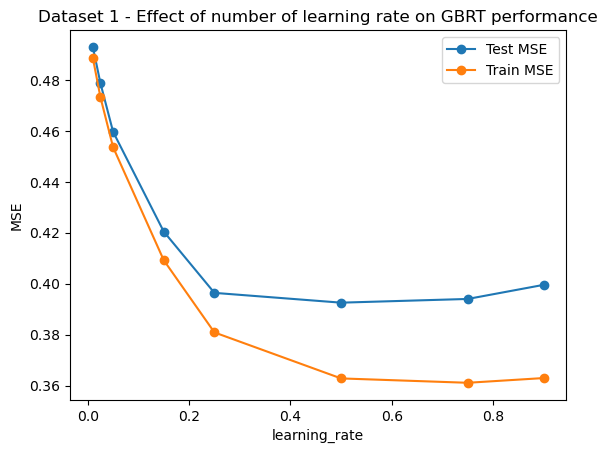

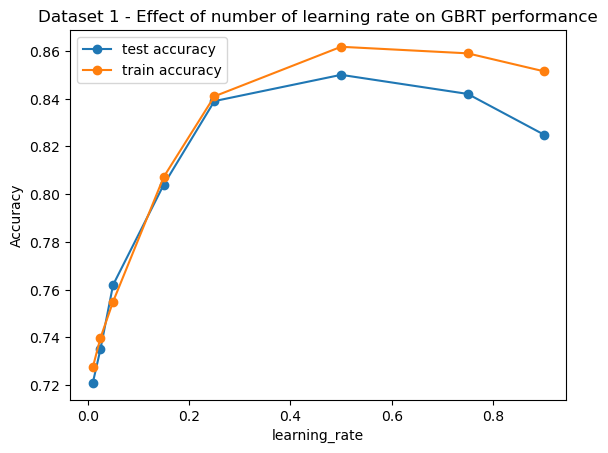

In [67]:
learning_rate_list = [0.01, 0.025, 0.05, 0.15, 0.25, 0.5, 0.75, 0.9]
mse_list = []
mse_train = []
test_acc = []
train_acc = []


print("Dataset 1")
for learning_rate in learning_rate_list:
    # fit GBRT model to dataset 2
    models1 = gbrt_fit_argmin_(X1_train, y1_train, n_estimators=12, max_depth=2, learning_rate=learning_rate)

    # predict on test set
    y1_pred = gbrt_predict(X1_test, models1, learning_rate=learning_rate)
    y1_train_pred = gbrt_predict(X1_train, models1, learning_rate=learning_rate)
    y1_train_pred_binary = np.where(y1_train_pred > 0, 1, 0)
    
    print(f"learning rate: {learning_rate}")
    y1_pred_binary = np.where(y1_pred > 0, 1, 0)
    print("Test group classification report")
    print(classification_report(y1_test,y1_pred_binary))

    # calculate MSE
    mse = mse_loss(y1_test, y1_pred)
    mse_list.append(mse)
    mse = mse_loss(y1_train, gbrt_predict(X1_train, models1, learning_rate=learning_rate))
    mse_train.append(mse)
    
    test_accuracy = accuracy_score(y1_test, y1_pred_binary)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y1_train, y1_train_pred_binary)
    train_acc.append(train_accuracy)

# plot results
plt.plot(learning_rate_list, mse_list, label = "Test MSE", marker = 'o')
plt.plot(learning_rate_list, mse_train, label = "Train MSE", marker = 'o')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.title('Dataset 1 - Effect of number of learning rate on GBRT performance')
plt.show()


# plot results
plt.plot(learning_rate_list, test_acc, label = "test accuracy", marker = 'o')
plt.plot(learning_rate_list, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('Dataset 1 - Effect of number of learning rate on GBRT performance')
plt.show()

Dataset 2
learning rate: 0.01
Test group classification report
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      9956
           1       0.72      0.73      0.72     10044

    accuracy                           0.72     20000
   macro avg       0.72      0.72      0.72     20000
weighted avg       0.72      0.72      0.72     20000

learning rate: 0.025
Test group classification report
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      9956
           1       0.74      0.73      0.73     10044

    accuracy                           0.73     20000
   macro avg       0.73      0.73      0.73     20000
weighted avg       0.73      0.73      0.73     20000

learning rate: 0.05
Test group classification report
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      9956
           1       0.76      0.74      0.75     10044

    accuracy

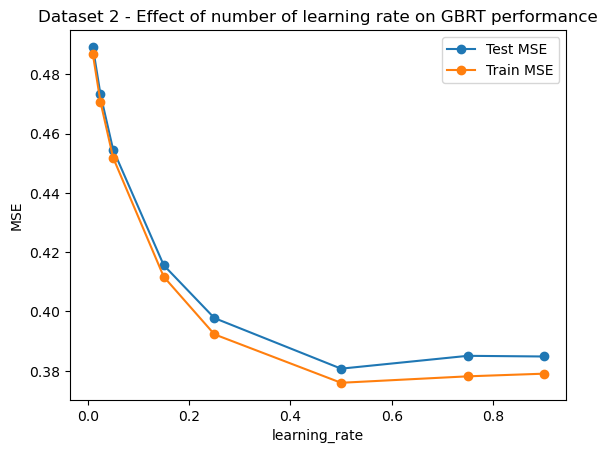

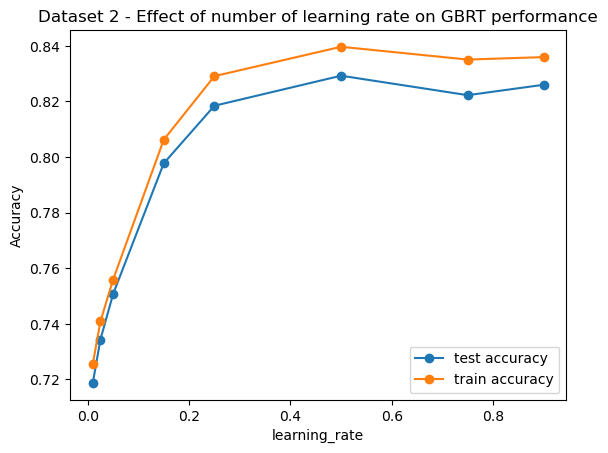

In [72]:
learning_rate_list = [0.01, 0.025, 0.05, 0.15, 0.25, 0.5, 0.75, 0.9]
mse_list = []
train_mse = []
test_acc = []
train_acc = []

print("Dataset 2")
for learning_rate in learning_rate_list:
    # fit GBRT model to dataset 2
    models2 = gbrt_fit_argmin_(X2_train, y2_train, n_estimators=22, max_depth=2, learning_rate=learning_rate)

    # predict on test set
    y2_pred = gbrt_predict(X2_test, models2, learning_rate=learning_rate)
    y2_train_pred = gbrt_predict(X2_train, models2, learning_rate=learning_rate)
    y2_train_pred_binary = np.where(y2_train_pred > 0, 1, 0)
    
    print(f"learning rate: {learning_rate}")
    y2_pred_binary = np.where(y2_pred > 0, 1, 0)
    print("Test group classification report")
    print(classification_report(y2_test,y2_pred_binary))

    # calculate MSE
    mse = mse_loss(y2_test, y2_pred)
    mse_list.append(mse)
    mse = mse_loss(y2_train, gbrt_predict(X2_train, models2, learning_rate=learning_rate))
    train_mse.append(mse)
    
    test_accuracy = accuracy_score(y2_test, y2_pred_binary)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y2_train, y2_train_pred_binary)
    train_acc.append(train_accuracy)


# plot results
plt.plot(learning_rate_list, mse_list, label = "Test MSE", marker = 'o')
plt.plot(learning_rate_list, train_mse, label = "Train MSE", marker = 'o')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.title('Dataset 2 - Effect of number of learning rate on GBRT performance')
plt.show()

# plot results
plt.plot(learning_rate_list, test_acc, label = "test accuracy", marker = 'o')
plt.plot(learning_rate_list, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('Dataset 2 - Effect of number of learning rate on GBRT performance')
plt.show()

## Weak learner strength (max depth) effect on performance

Dataset 1
max depth is: 2
Test group classification report
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       495
           1       0.93      0.85      0.89       505

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

max depth is: 3
Test group classification report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       495
           1       0.94      0.88      0.91       505

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

max depth is: 4
Test group classification report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       495
           1       0.94      0.90      0.92       505

    accuracy             

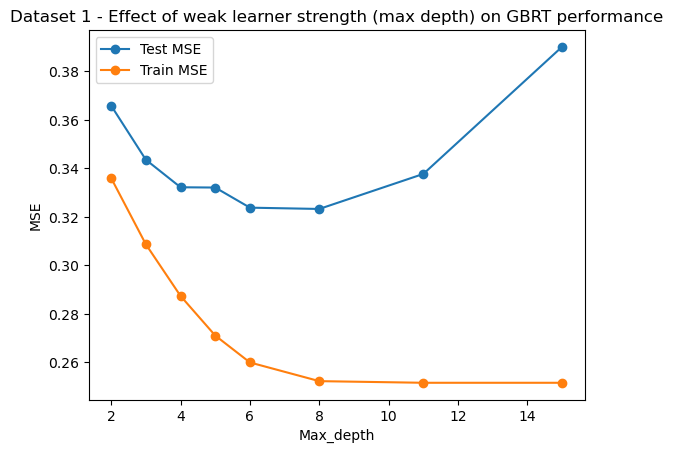

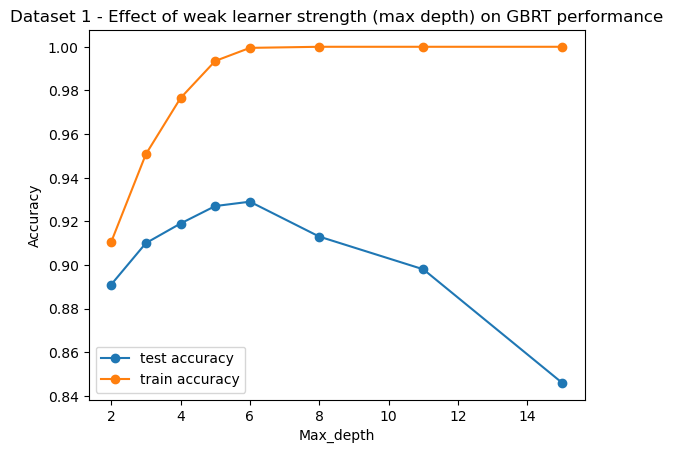

In [189]:
max_depths = [1, 2, 3,4, 5,6, 8, 11, 15]
mse_list = []
train_mse = []
test_acc = []
train_acc = []

print("Dataset 1")
for depth in max_depths:
    # fit GBRT model to dataset 1
    models1 = gbrt_fit_argmin_(X1_train, y1_train, n_estimators=100, max_depth=depth, learning_rate=0.15)

    # predict on test set
    y1_pred = gbrt_predict(X1_test, models1, learning_rate=0.15)
    y1_train_pred = gbrt_predict(X1_train, models1, learning_rate=0.15)
    y1_train_pred_binary = np.where(y1_train_pred > 0, 1, 0)
    
    print(f"max depth is: {depth}")
    y1_pred_binary = np.where(y1_pred > 0, 1, 0)
    print("Test group classification report")
    print(classification_report(y1_test,y1_pred_binary))

    # calculate MSE
    mse = mse_loss(y1_test, y1_pred)
    mse_list.append(mse)
    mse = mse_loss(y1_train, gbrt_predict(X1_train, models1, learning_rate=0.15))
    train_mse.append(mse)
    
    test_accuracy = accuracy_score(y1_test, y1_pred_binary)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y1_train, y1_train_pred_binary)
    train_acc.append(train_accuracy)


# plot results
plt.plot(max_depths, mse_list, label = "Test MSE", marker = 'o')
plt.plot(max_depths, train_mse, label = "Train MSE", marker = 'o')
plt.legend()
plt.xlabel('Max_depth')
plt.ylabel('MSE')
plt.title('Dataset 1 - Effect of weak learner strength (max depth) on GBRT performance')
plt.show()

# plot results
plt.plot(max_depths, test_acc, label = "test accuracy", marker = 'o')
plt.plot(max_depths, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Dataset 1 - Effect of weak learner strength (max depth) on GBRT performance')
plt.show()

Dataset 2
max depth is: 2
Test group classification report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      9956
           1       0.87      0.86      0.87     10044

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000

max depth is: 3
Test group classification report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9956
           1       0.90      0.90      0.90     10044

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000

max depth is: 4
Test group classification report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      9956
           1       0.93      0.93      0.93     10044

    accuracy             

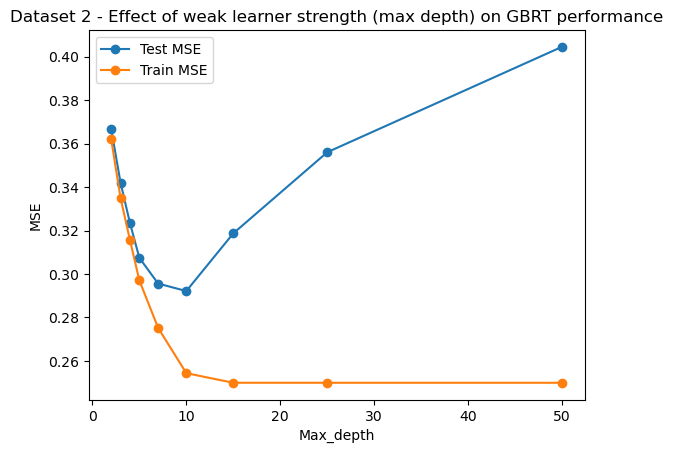

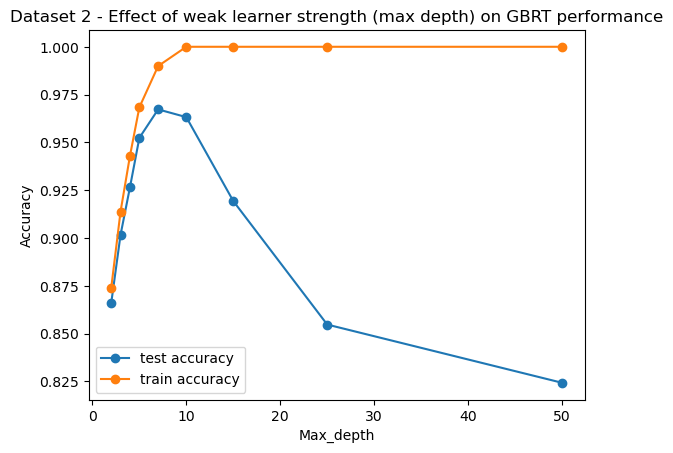

In [11]:
max_depths = [1,2,3,4, 5,7, 10, 15, 25, 50]
mse_list = []
train_mse = []
test_acc = []
train_acc = []

print("Dataset 2")
for depth in max_depths:
    # fit GBRT model to dataset 1
    models2 = gbrt_fit_argmin_(X2_train, y2_train, n_estimators=100, max_depth=depth, learning_rate=0.15)

    # predict on test set
    y2_pred = gbrt_predict(X2_test, models2, learning_rate=0.15)
    y2_train_pred = gbrt_predict(X2_train, models2, learning_rate=0.15)
    y2_train_pred_binary = np.where(y2_train_pred > 0, 1, 0)
    
    print(f"max depth is: {depth}")
    y2_pred_binary = np.where(y2_pred > 0, 1, 0)
    print("Test group classification report")
    print(classification_report(y2_test,y2_pred_binary))

    # calculate MSE
    mse = mse_loss(y2_test, y2_pred)
    mse_list.append(mse)
    mse = mse_loss(y2_train, gbrt_predict(X2_train, models2, learning_rate=0.15))
    train_mse.append(mse)
    
    test_accuracy = accuracy_score(y2_test, y2_pred_binary)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y2_train, y2_train_pred_binary)
    train_acc.append(train_accuracy)


# plot results
plt.plot(max_depths, mse_list, label = "Test MSE", marker = 'o')
plt.plot(max_depths, train_mse, label = "Train MSE", marker = 'o')
plt.legend()
plt.xlabel('Max_depth')
plt.ylabel('MSE')
plt.title('Dataset 2 - Effect of weak learner strength (max depth) on GBRT performance')
plt.show()

# plot results
plt.plot(max_depths, test_acc, label = "test accuracy", marker = 'o')
plt.plot(max_depths, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.title('Dataset 2 - Effect of weak learner strength (max depth) on GBRT performance')
plt.show()

## Comparison of fit functions (that tweak the algorithm in certain ways)
Explained above fit functions and in brief report

The three fit functions (described above) comparison - using dataset 2

In [12]:
def get_mse_acc_learn(fit_func, learning_list, n_estimators):
    mse_list = []
    train_mse = []
    test_acc = []
    train_acc = []

    for rate in learning_list:

        models2 = fit_func(X2_train, y2_train, n_estimators=n_estimators, max_depth=2, learning_rate=rate)

        # predict on test set
        y2_pred = gbrt_predict(X2_test, models2, learning_rate=rate)
        y2_train_pred = gbrt_predict(X2_train, models2, learning_rate=rate)
        y2_train_pred_binary = np.where(y2_train_pred > 0, 1, 0)

        y2_pred_binary = np.where(y2_pred > 0, 1, 0)

        # calculate MSE
        mse = mse_loss(y2_test, y2_pred)
        mse_list.append(mse)
        mse = mse_loss(y2_train, gbrt_predict(X2_train, models2, learning_rate=rate))
        train_mse.append(mse)

        test_accuracy = accuracy_score(y2_test, y2_pred_binary)
        test_acc.append(test_accuracy)
        train_accuracy = accuracy_score(y2_train, y2_train_pred_binary)
        train_acc.append(train_accuracy)
    
    return mse_list, train_mse, test_acc, train_acc



In [13]:
def get_mse_acc_estimators(fit_func, estimators_list, rate):
    mse_list = []
    train_mse = []
    test_acc = []
    train_acc = []

    for n_estimators in estimators_list:

        models2 = fit_func(X2_train, y2_train, n_estimators=n_estimators, max_depth=2, learning_rate=rate)

        # predict on test set
        y2_pred = gbrt_predict(X2_test, models2, learning_rate=rate)
        y2_train_pred = gbrt_predict(X2_train, models2, learning_rate=rate)
        y2_train_pred_binary = np.where(y2_train_pred > 0, 1, 0)

        y2_pred_binary = np.where(y2_pred > 0, 1, 0)

        # calculate MSE
        mse = mse_loss(y2_test, y2_pred)
        mse_list.append(mse)
        mse = mse_loss(y2_train, gbrt_predict(X2_train, models2, learning_rate=rate))
        train_mse.append(mse)

        test_accuracy = accuracy_score(y2_test, y2_pred_binary)
        test_acc.append(test_accuracy)
        train_accuracy = accuracy_score(y2_train, y2_train_pred_binary)
        train_acc.append(train_accuracy)
    
    return mse_list, train_mse, test_acc, train_acc



In [14]:
def get_mse_acc_depth(fit_func, max_depths, n_estimators, rate):
    mse_list = []
    train_mse = []
    test_acc = []
    train_acc = []

    for depth in max_depths:

        models2 = fit_func(X2_train, y2_train, n_estimators=n_estimators, max_depth=depth, learning_rate=rate)

        # predict on test set
        y2_pred = gbrt_predict(X2_test, models2, learning_rate=rate)
        y2_train_pred = gbrt_predict(X2_train, models2, learning_rate=rate)
        y2_train_pred_binary = np.where(y2_train_pred > 0, 1, 0)

        y2_pred_binary = np.where(y2_pred > 0, 1, 0)

        # calculate MSE
        mse = mse_loss(y2_test, y2_pred)
        mse_list.append(mse)
        mse = mse_loss(y2_train, gbrt_predict(X2_train, models2, learning_rate=rate))
        train_mse.append(mse)

        test_accuracy = accuracy_score(y2_test, y2_pred_binary)
        test_acc.append(test_accuracy)
        train_accuracy = accuracy_score(y2_train, y2_train_pred_binary)
        train_acc.append(train_accuracy)
    
    return mse_list, train_mse, test_acc, train_acc



Dataset 2


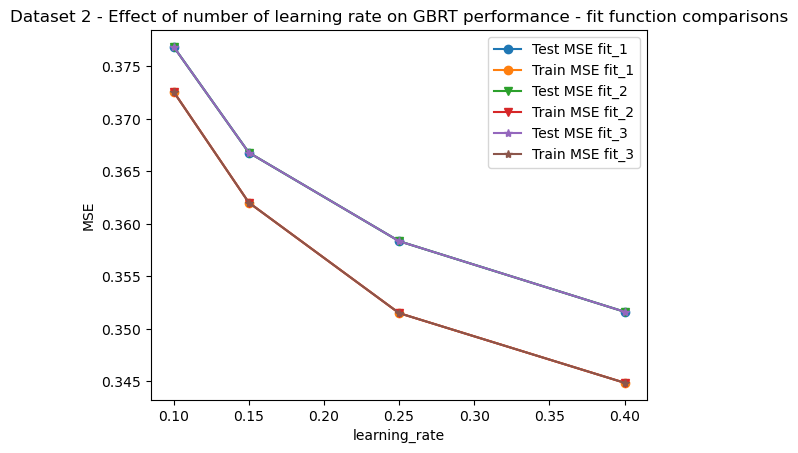

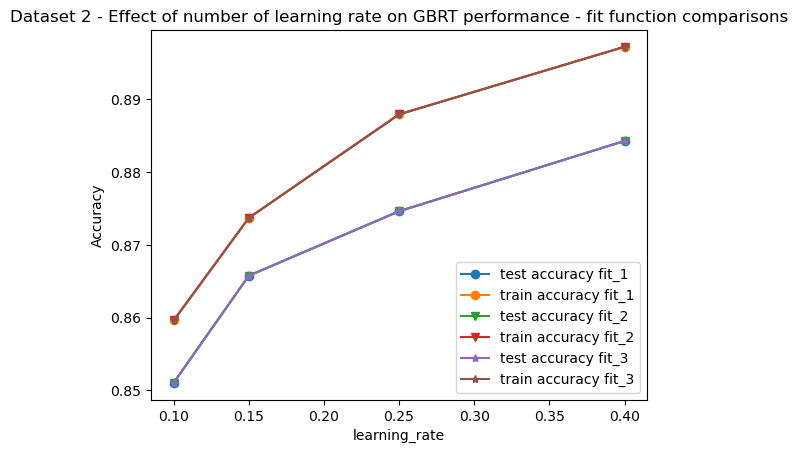

In [15]:
learning_rate_list = [0.1, 0.15, 0.25, 0.4]

print("Dataset 2")

mse_list, train_mse, test_acc, train_acc = get_mse_acc_learn(gbrt_fit, learning_rate_list, 100)
mse_list_argmin_, train_mse_argmin_, test_acc_argmin_, train_acc_argmin_ = get_mse_acc_learn(gbrt_fit_argmin_, learning_rate_list, 100)
mse_list_argmin, train_mse_argmin, test_acc_argmin, train_acc_argmin = get_mse_acc_learn(gbrt_fit_argmin, learning_rate_list, 100)



# plot results
plt.plot(learning_rate_list, mse_list, label = "Test MSE fit_1", marker = 'o')
plt.plot(learning_rate_list, train_mse, label = "Train MSE fit_1", marker = 'o')
plt.plot(learning_rate_list, mse_list_argmin, label = "Test MSE fit_2", marker = 'v')
plt.plot(learning_rate_list, train_mse_argmin, label = "Train MSE fit_2", marker = 'v')
plt.plot(learning_rate_list, mse_list_argmin_, label = "Test MSE fit_3", marker = '*')
plt.plot(learning_rate_list, train_mse_argmin_, label = "Train MSE fit_3", marker = '*')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('MSE')
plt.title('Dataset 2 - Effect of number of learning rate on GBRT performance - fit function comparisons')
plt.show()

# plot results
plt.plot(learning_rate_list, test_acc, label = "test accuracy fit_1", marker = 'o')
plt.plot(learning_rate_list, train_acc, label = "train accuracy fit_1", marker = 'o')
plt.plot(learning_rate_list, test_acc_argmin, label = "test accuracy fit_2", marker = 'v')
plt.plot(learning_rate_list, train_acc_argmin, label = "train accuracy fit_2", marker = 'v')
plt.plot(learning_rate_list, test_acc_argmin_, label = "test accuracy fit_3", marker = '*')
plt.plot(learning_rate_list, train_acc_argmin_, label = "train accuracy fit_3", marker = '*')
plt.legend()
plt.xlabel('learning_rate')
plt.ylabel('Accuracy')
plt.title('Dataset 2 - Effect of number of learning rate on GBRT performance - fit function comparisons')
plt.show()

Dataset 2


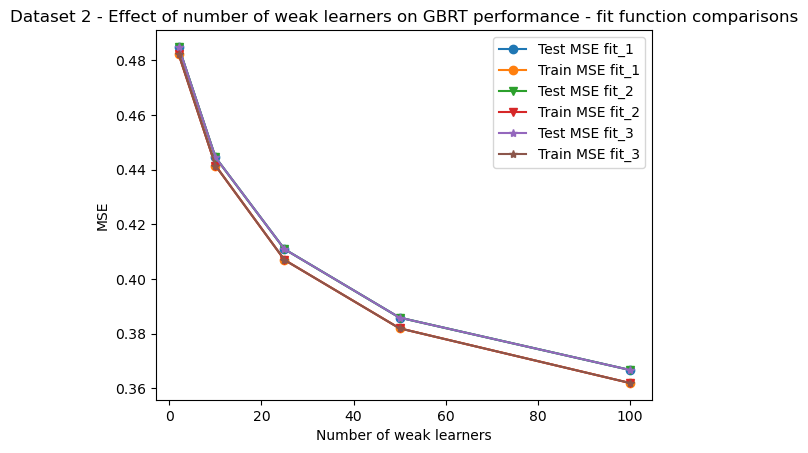

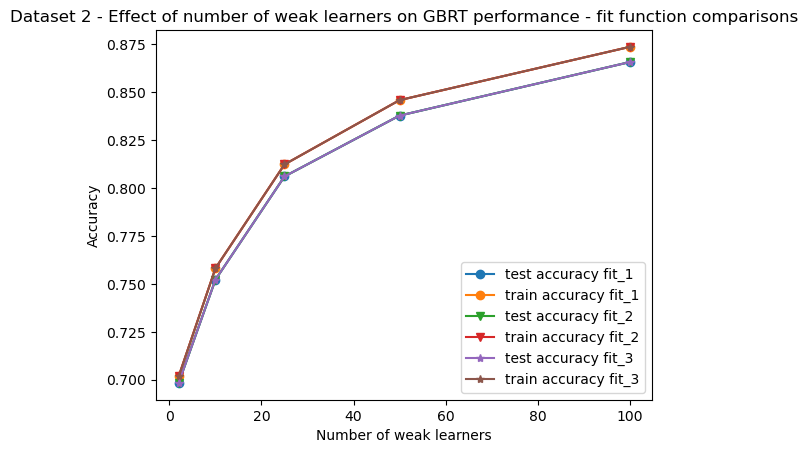

In [16]:
estimators_list = [2, 10, 25, 50, 100]

print("Dataset 2")

mse_list, train_mse, test_acc, train_acc = get_mse_acc_estimators(gbrt_fit, estimators_list, 0.15)
mse_list_argmin_, train_mse_argmin_, test_acc_argmin_, train_acc_argmin_ = get_mse_acc_estimators(gbrt_fit_argmin_, estimators_list, 0.15)
mse_list_argmin, train_mse_argmin, test_acc_argmin, train_acc_argmin = get_mse_acc_estimators(gbrt_fit_argmin, estimators_list, 0.15)



# plot results
plt.plot(estimators_list, mse_list, label = "Test MSE fit_1", marker = 'o')
plt.plot(estimators_list, train_mse, label = "Train MSE fit_1", marker = 'o')
plt.plot(estimators_list, mse_list_argmin, label = "Test MSE fit_2", marker = 'v')
plt.plot(estimators_list, train_mse_argmin, label = "Train MSE fit_2", marker = 'v')
plt.plot(estimators_list, mse_list_argmin_, label = "Test MSE fit_3", marker = '*')
plt.plot(estimators_list, train_mse_argmin_, label = "Train MSE fit_3", marker = '*')
plt.legend()
plt.xlabel('Number of weak learners')
plt.ylabel('MSE')
plt.title('Dataset 2 - Effect of number of weak learners on GBRT performance - fit function comparisons')
plt.show()

# plot results
plt.plot(estimators_list, test_acc, label = "test accuracy fit_1", marker = 'o')
plt.plot(estimators_list, train_acc, label = "train accuracy fit_1", marker = 'o')
plt.plot(estimators_list, test_acc_argmin, label = "test accuracy fit_2", marker = 'v')
plt.plot(estimators_list, train_acc_argmin, label = "train accuracy fit_2", marker = 'v')
plt.plot(estimators_list, test_acc_argmin_, label = "test accuracy fit_3", marker = '*')
plt.plot(estimators_list, train_acc_argmin_, label = "train accuracy fit_3", marker = '*')
plt.legend()
plt.xlabel('Number of weak learners')
plt.ylabel('Accuracy')
plt.title('Dataset 2 - Effect of number of weak learners on GBRT performance - fit function comparisons')
plt.show()

Dataset 2


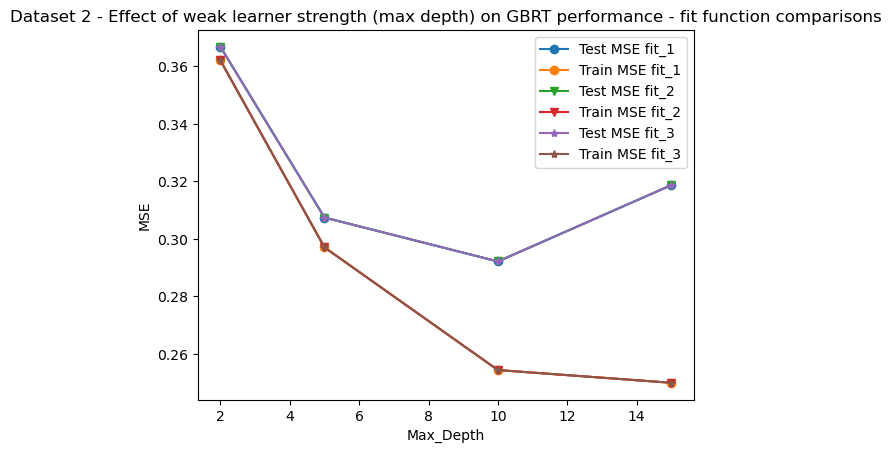

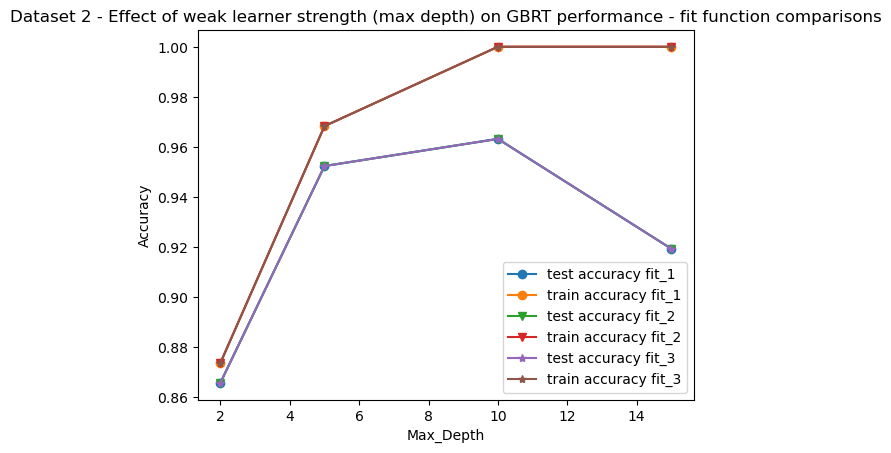

In [17]:
depths = [2, 5, 10, 15]

print("Dataset 2")

mse_list, train_mse, test_acc, train_acc = get_mse_acc_depth(gbrt_fit, depths, 100, 0.15)
mse_list_argmin_, train_mse_argmin_, test_acc_argmin_, train_acc_argmin_ = get_mse_acc_depth(gbrt_fit_argmin_, depths, 100, 0.15)
mse_list_argmin, train_mse_argmin, test_acc_argmin, train_acc_argmin = get_mse_acc_depth(gbrt_fit_argmin, depths, 100, 0.15)



# plot results
plt.plot(depths, mse_list, label = "Test MSE fit_1", marker = 'o')
plt.plot(depths, train_mse, label = "Train MSE fit_1", marker = 'o')
plt.plot(depths, mse_list_argmin, label = "Test MSE fit_2", marker = 'v')
plt.plot(depths, train_mse_argmin, label = "Train MSE fit_2", marker = 'v')
plt.plot(depths, mse_list_argmin_, label = "Test MSE fit_3", marker = '*')
plt.plot(depths, train_mse_argmin_, label = "Train MSE fit_3", marker = '*')
plt.legend()
plt.xlabel('Max_Depth')
plt.ylabel('MSE')
plt.title('Dataset 2 - Effect of weak learner strength (max depth) on GBRT performance - fit function comparisons')
plt.show()

# plot results
plt.plot(depths, test_acc, label = "test accuracy fit_1", marker = 'o')
plt.plot(depths, train_acc, label = "train accuracy fit_1", marker = 'o')
plt.plot(depths, test_acc_argmin, label = "test accuracy fit_2", marker = 'v')
plt.plot(depths, train_acc_argmin, label = "train accuracy fit_2", marker = 'v')
plt.plot(depths, test_acc_argmin_, label = "test accuracy fit_3", marker = '*')
plt.plot(depths, train_acc_argmin_, label = "train accuracy fit_3", marker = '*')
plt.legend()
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
plt.title('Dataset 2 - Effect of weak learner strength (max depth) on GBRT performance - fit function comparisons')
plt.show()

As we can see they all yield very similar if not same results

### AdaBoost

In [534]:
def initialize_weights(n_samples):
    return np.ones(n_samples) / n_samples

In [535]:
# Alpha - namely "finding alpha", alpha is returned
def step_size(error, lr):
    return lr * np.log((1 - error) / (error + 1e-10)) # 1e-10 for no zero div

In [536]:
def weighted_classification_error(y_true, y_pred, w):
    return np.sum(w[y_true != y_pred])

In [537]:
def update_weights(weights, alpha, y_train, y_pred_train):
    eps = weighted_classification_error(y_train,y_pred_train,weights)
    weights *= np.exp(-alpha * y_train * y_pred_train)
    weights /= (2 * np.sqrt(eps * (1 - eps)))
    return weights

In [538]:
# This is not in use but for evaluation purposes
def argmin_h(X ,y_true, w, models, model_):
    y_pred = model_.predict(X)
    current_minval = weighted_classification_error(y_true,y_pred,w)
    current_argmin = model_
    for model in models:
        y_pred = model.predict(X)
        val = weighted_classification_error(y_true,y_pred,w)
        if val < current_minval:
            current_minval = val
            current_argmin = model
    return current_argmin

In [539]:
def get_decision_stump(X, y, max_depth):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X, y)
    return model

In [540]:
def adaboost_predict(X, H, alphas):
        
        y_pred = np.zeros(X.shape[0])
        # Predict the labels for each weak learner.
        i = 0
        for h in H:
            y_pred += alphas[i] * h.predict(X)
            i += 1
            
        return np.sign(y_pred)

In [541]:
def weighted_bootstrap(X, y, r, weights):

    # Resample the data with replacement, using the weights to determine the probability of each data point being selected.

    z = int(len(y) * r)
    indices = np.random.choice(len(X), size=z, p=weights/sum(weights))

    return X[indices], y[indices]


Below is the adaboost implementation with bootstrapping (This is the implementation from lecture slides using only the square brackets with the bootstrapping for new weak learner, without taking the one that miniizes classification error)
Let's denote this for future reference by adaboost_only_boot

In [543]:
def adaboost_weighted_bootstrap(X, y, n_estimators, max_depth, r, lr):

    H = []
    alphas = []
    weights = initialize_weights(len(y))

    for i in range(n_estimators):

        X_subset,y_subset = weighted_bootstrap(X,y,r, weights)
        h = get_decision_stump(X_subset, y_subset, max_depth)
        y_pred = h.predict(X)
        eps = weighted_classification_error(y,y_pred,weights)
        
        if eps < 0.5:
            alpha = step_size(eps, lr)
            alphas.append(alpha)
            H.append(h)
            # Ht+1 = Ht + alpha * h
            weights = update_weights(weights, alpha, y, y_pred)
        else:
            return H, weights
        
    return H, weights

Below is an adaboost function with bootstrap and argmin h as in pseudocode from lecture (the weak learner purely the one that minimizes error) -  we will use this in the expirements (as it is the base version from lecture), and compare to rest at end of section
Let's denote this for future reference by adaboost_argmin

In [563]:
def adaboost_argmin(X, y, n_estimators, max_depth, r, lr):
    
    H = []
    alphas = []
    weights = initialize_weights(len(y))
    
    for i in range(n_estimators):
        
        X_subset,y_subset = weighted_bootstrap(X,y,r, weights)
        h = get_decision_stump(X_subset, y_subset, max_depth)
        h = argmin_h(X, y, weights, H, h)
        y_pred = h.predict(X)
        eps = weighted_classification_error(y,y_pred,weights)
        
        if eps < 0.5:
            alpha = step_size(eps, lr)
            alphas.append(alpha)           
            H.append(h)
            # Ht+1 = Ht + alpha * h
            weights = update_weights(weights, alpha, y, y_pred)
            
        else:
            return H, alphas
        
    return H, alphas
        

Changing labeling for adaboost section

In [583]:
y1_train[y1_train == 0] = -1
y1_test[y1_test == 0] = -1
y2_train[y2_train == 0] = -1
y2_test[y2_test == 0] = -1

## Experiments

## Effect of number of weak learners (decision stumps) on performance

Here the bootstrap is 0.9 * size of the train set (as this was found to be a good size, and was suggested in online sources)

-----------------Dataset 1--------------------
Number of estimators/weak classifiers are = 1
Test group classification report
              precision    recall  f1-score   support

          -1       0.64      0.78      0.70       495
           1       0.72      0.57      0.63       505

    accuracy                           0.67      1000
   macro avg       0.68      0.67      0.67      1000
weighted avg       0.68      0.67      0.67      1000

Number of estimators/weak classifiers are = 5
Test group classification report
              precision    recall  f1-score   support

          -1       0.71      0.83      0.77       495
           1       0.80      0.66      0.73       505

    accuracy                           0.75      1000
   macro avg       0.76      0.75      0.75      1000
weighted avg       0.76      0.75      0.75      1000

Number of estimators/weak classifiers are = 7
Test group classification report
              precision    recall  f1-score   support

       

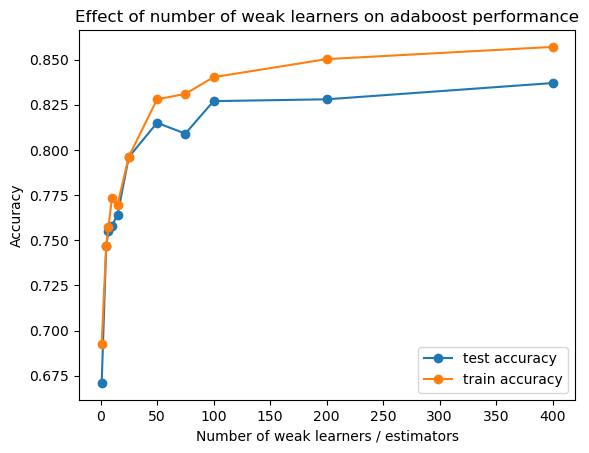

In [562]:
print("-----------------Dataset 1--------------------")
train_acc = []
test_acc = []
n_estimators = [1,5, 7, 10, 15, 25, 50, 75, 100,200,400]
for n_estimator in n_estimators:
    models,alphas = adaboost_argmin(X1_train, y1_train, n_estimator, 1, 0.9, 0.5)
    y1_pred = adaboost_predict(X1_test, models, alphas)
    print(f"Number of estimators/weak classifiers are = {n_estimator}")
    print("Test group classification report")
    print(classification_report(y1_test,y1_pred))
    
    test_accuracy = accuracy_score(y1_test, y1_pred)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y1_train, adaboost_predict(X1_train, models, alphas))
    train_acc.append(train_accuracy)
    
# plot results
plt.plot(n_estimators, test_acc, label = "test accuracy", marker = 'o')
plt.plot(n_estimators, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('Number of weak learners / estimators')
plt.ylabel('Accuracy')
plt.title('Effect of number of weak learners on adaboost performance')
plt.show()

-----------------Dataset 2--------------------
Number of estimators/weak classifiers are = 1
Test group classification report
              precision    recall  f1-score   support

          -1       0.59      0.73      0.65      9956
           1       0.64      0.49      0.56     10044

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.60     20000
weighted avg       0.61      0.61      0.60     20000

Number of estimators/weak classifiers are = 5
Test group classification report
              precision    recall  f1-score   support

          -1       0.68      0.76      0.72      9956
           1       0.73      0.64      0.69     10044

    accuracy                           0.70     20000
   macro avg       0.71      0.70      0.70     20000
weighted avg       0.71      0.70      0.70     20000

Number of estimators/weak classifiers are = 7
Test group classification report
              precision    recall  f1-score   support

       

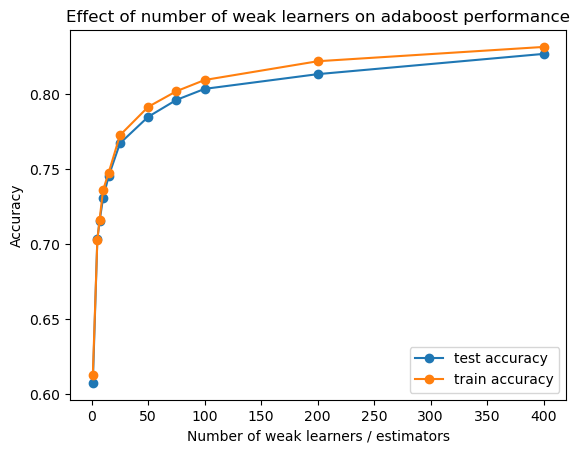

In [569]:
print("-----------------Dataset 2--------------------")
train_acc = []
test_acc = []
n_estimators = [1,5, 7, 10, 15, 25, 50, 75, 100,200,400]
for n_estimator in n_estimators:
    models,alphas = adaboost_argmin(X2_train, y2_train, n_estimator, 1, 0.9, 0.5)
    y2_pred = adaboost_predict(X2_test, models, alphas)
    print(f"Number of estimators/weak classifiers are = {n_estimator}")
    print("Test group classification report")
    print(classification_report(y2_test,y2_pred))
    
    test_accuracy = accuracy_score(y2_test, y2_pred)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y2_train, adaboost_predict(X2_train, models, alphas))
    train_acc.append(train_accuracy)
    
# plot results
plt.plot(n_estimators, test_acc, label = "test accuracy", marker = 'o')
plt.plot(n_estimators, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('Number of weak learners / estimators')
plt.ylabel('Accuracy')
plt.title('Effect of number of weak learners on adaboost performance')
plt.show()

## Effect of learning rate on performance
(we will use 50 estimators as from the above section we learn that is enough for evaluating purposes)

-----------------Dataset 1--------------------
learning rate = 0.05
Test group classification report
              precision    recall  f1-score   support

          -1       0.68      0.73      0.70       495
           1       0.71      0.66      0.68       505

    accuracy                           0.69      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.70      0.69      0.69      1000

learning rate = 0.0975
Test group classification report
              precision    recall  f1-score   support

          -1       0.71      0.78      0.74       495
           1       0.76      0.69      0.73       505

    accuracy                           0.73      1000
   macro avg       0.74      0.74      0.73      1000
weighted avg       0.74      0.73      0.73      1000

learning rate = 0.14500000000000002
Test group classification report
              precision    recall  f1-score   support

          -1       0.70      0.82      0.76       495
           

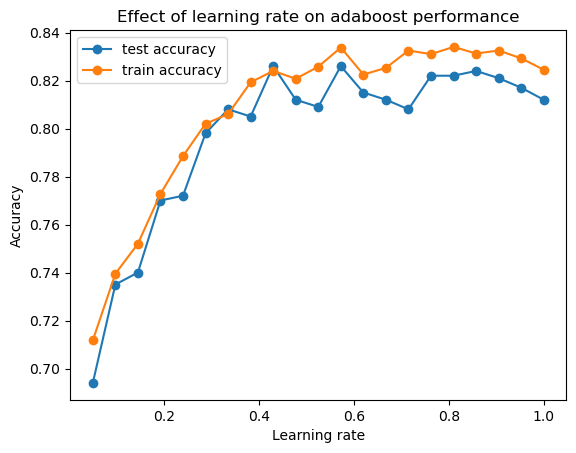

In [571]:
print("-----------------Dataset 1--------------------")
train_acc = []
test_acc = []
learning_rates = np.linspace(0.05, 1, 21)
for rate in learning_rates:
    models,alphas = adaboost_argmin(X1_train, y1_train, 50, 1, 0.9, rate)
    y1_pred = adaboost_predict(X1_test, models, alphas)
    print(f"learning rate = {rate}")
    print("Test group classification report")
    print(classification_report(y1_test,y1_pred))
    
    test_accuracy = accuracy_score(y1_test, y1_pred)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y1_train, adaboost_predict(X1_train, models, alphas))
    train_acc.append(train_accuracy)
    
# plot results
plt.plot(learning_rates, test_acc, label = "test accuracy", marker = 'o')
plt.plot(learning_rates, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Effect of learning rate on adaboost performance')
plt.show()

-----------------Dataset 2--------------------
learning rate = 0.05
Test group classification report
              precision    recall  f1-score   support

          -1       0.71      0.75      0.73      9956
           1       0.73      0.69      0.71     10044

    accuracy                           0.72     20000
   macro avg       0.72      0.72      0.72     20000
weighted avg       0.72      0.72      0.72     20000

learning rate = 0.0975
Test group classification report
              precision    recall  f1-score   support

          -1       0.72      0.73      0.72      9956
           1       0.73      0.72      0.72     10044

    accuracy                           0.72     20000
   macro avg       0.72      0.72      0.72     20000
weighted avg       0.72      0.72      0.72     20000

learning rate = 0.14500000000000002
Test group classification report
              precision    recall  f1-score   support

          -1       0.75      0.74      0.75      9956
           

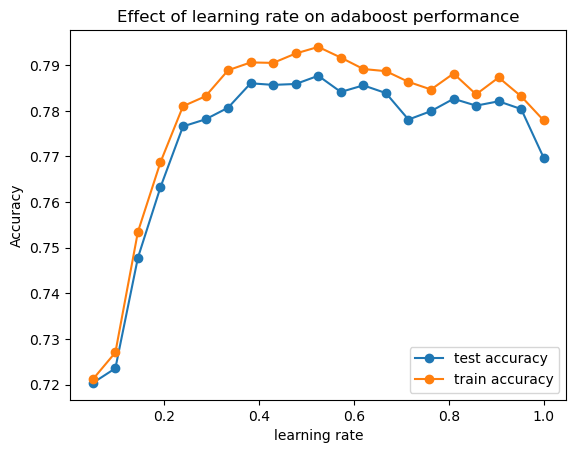

In [572]:
print("-----------------Dataset 2--------------------")
train_acc = []
test_acc = []
learning_rates = np.linspace(0.05, 1, 21)
for rate in learning_rates:
    models,alphas = adaboost_argmin(X2_train, y2_train, 50, 1, 0.9, rate)
    y2_pred = adaboost_predict(X2_test, models, alphas)
    print(f"learning rate = {rate}")
    print("Test group classification report")
    print(classification_report(y2_test,y2_pred))
    
    test_accuracy = accuracy_score(y2_test, y2_pred)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y2_train, adaboost_predict(X2_train, models, alphas))
    train_acc.append(train_accuracy)
    
# plot results
plt.plot(learning_rates, test_acc, label = "test accuracy", marker = 'o')
plt.plot(learning_rates, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
plt.title('Effect of learning rate on adaboost performance')
plt.show()

## Effect of bootstrap ratio on adaboost performance
Here 50 estimators will be used and a learning rate of 0.5 (as in lecture)

-----------------Dataset 1--------------------
bootstrap ratio = 0.1
Test group classification report
              precision    recall  f1-score   support

          -1       0.80      0.83      0.82       495
           1       0.83      0.80      0.81       505

    accuracy                           0.81      1000
   macro avg       0.82      0.82      0.81      1000
weighted avg       0.82      0.81      0.81      1000

bootstrap ratio = 0.2
Test group classification report
              precision    recall  f1-score   support

          -1       0.79      0.84      0.82       495
           1       0.83      0.78      0.81       505

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000

bootstrap ratio = 0.30000000000000004
Test group classification report
              precision    recall  f1-score   support

          -1       0.79      0.83      0.81       495
         

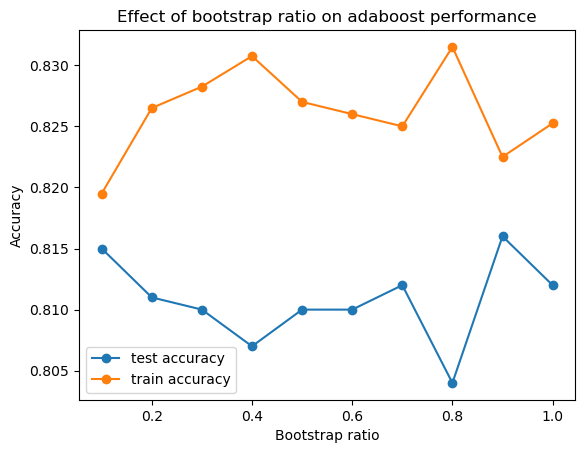

In [578]:
print("-----------------Dataset 1--------------------")
train_acc = []
test_acc = []
ratios = np.linspace(0.1, 1, 10)
for r in ratios:
    models,alphas = adaboost_argmin(X1_train, y1_train, 50, 1, r, 0.5)
    y1_pred = adaboost_predict(X1_test, models, alphas)
    print(f"bootstrap ratio = {r}")
    print("Test group classification report")
    print(classification_report(y1_test,y1_pred))
    
    test_accuracy = accuracy_score(y1_test, y1_pred)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y1_train, adaboost_predict(X1_train, models, alphas))
    train_acc.append(train_accuracy)
    
# plot results
plt.plot(ratios, test_acc, label = "test accuracy", marker = 'o')
plt.plot(ratios, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('Bootstrap ratio')
plt.ylabel('Accuracy')
plt.title('Effect of bootstrap ratio on adaboost performance')
plt.show()

-----------------Dataset 2--------------------
bootstrap ratio = 0.05
Test group classification report
              precision    recall  f1-score   support

          -1       0.78      0.79      0.79      9956
           1       0.79      0.78      0.79     10044

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000

bootstrap ratio = 0.15555555555555556
Test group classification report
              precision    recall  f1-score   support

          -1       0.78      0.79      0.79      9956
           1       0.79      0.78      0.79     10044

    accuracy                           0.79     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.79      0.79      0.79     20000

bootstrap ratio = 0.2611111111111111
Test group classification report
              precision    recall  f1-score   support

          -1       0.78      0.77      0.78    

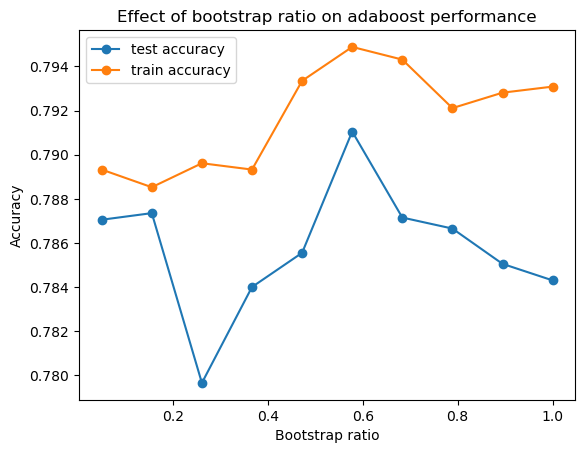

In [574]:
print("-----------------Dataset 2--------------------")
train_acc = []
test_acc = []
ratios = np.linspace(0.05, 1, 10)
for r in ratios:
    models,alphas = adaboost_argmin(X2_train, y2_train, 50, 1, r, 0.5)
    y2_pred = adaboost_predict(X2_test, models, alphas)
    print(f"bootstrap ratio = {r}")
    print("Test group classification report")
    print(classification_report(y2_test,y2_pred))
    
    test_accuracy = accuracy_score(y2_test, y2_pred)
    test_acc.append(test_accuracy)
    train_accuracy = accuracy_score(y2_train, adaboost_predict(X2_train, models, alphas))
    train_acc.append(train_accuracy)
    
# plot results
plt.plot(ratios, test_acc, label = "test accuracy", marker = 'o')
plt.plot(ratios, train_acc, label = "train accuracy", marker = 'o')
plt.legend()
plt.xlabel('Bootstrap ratio')
plt.ylabel('Accuracy')
plt.title('Effect of bootstrap ratio on adaboost performance')
plt.show()

## Fit function comparisons
Adaboost with only bootstrapping, vs adaboost with bootstrapping and taking weak learner that minimizes error
we will use bootstrap ratio of 0.9, learning rate of 0.5, and evaluate on num_estimators

-----------------Dataset 1--------------------


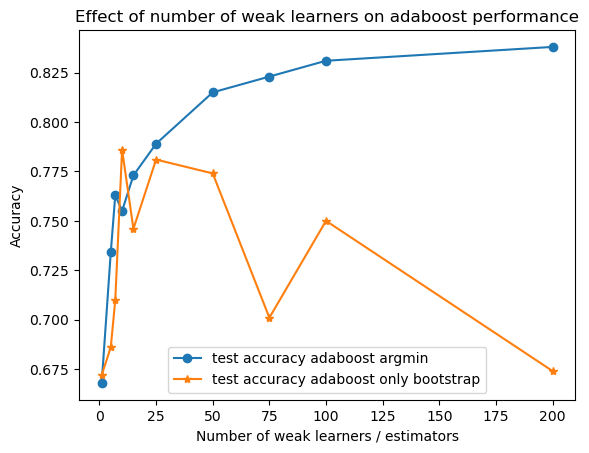

In [576]:
print("-----------------Dataset 1--------------------")
test_acc = []
test_acc_ = []
n_estimators = [1,5, 7, 10, 15, 25, 50, 75, 100,200]
for n_estimator in n_estimators:
    models,alphas = adaboost_argmin(X1_train, y1_train, n_estimator, 1, 0.9, 0.5)
    models_,alphas_ = adaboost_weighted_bootstrap(X1_train, y1_train, n_estimator, 1, 0.9, 0.5)
    
    y1_pred = adaboost_predict(X1_test, models, alphas)
    y1_pred_ = adaboost_predict(X1_test, models_, alphas_)
    
    test_accuracy = accuracy_score(y1_test, y1_pred)
    test_acc.append(test_accuracy)
    
    test_accuracy = accuracy_score(y1_test, y1_pred_)
    test_acc_.append(test_accuracy)
    
# plot results
plt.plot(n_estimators, test_acc, label = "test accuracy adaboost argmin", marker = 'o')
plt.plot(n_estimators, test_acc_, label = "test accuracy adaboost only bootstrap", marker = '*')
plt.legend()
plt.xlabel('Number of weak learners / estimators')
plt.ylabel('Accuracy')
plt.title('Effect of number of weak learners on adaboost performance')
plt.show()

-----------------Dataset 2--------------------


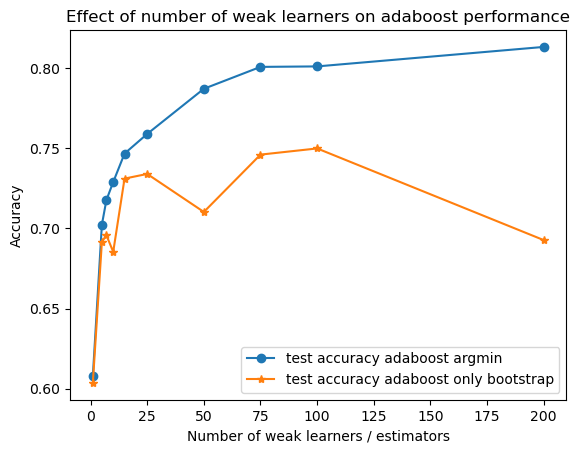

In [577]:
print("-----------------Dataset 2--------------------")
test_acc = []
test_acc_ = []
n_estimators = [1,5, 7, 10, 15, 25, 50, 75, 100,200]
for n_estimator in n_estimators:
    models,alphas = adaboost_argmin(X2_train, y2_train, n_estimator, 1, 0.9, 0.5)
    models_,alphas_ = adaboost_weighted_bootstrap(X2_train, y2_train, n_estimator, 1, 0.9, 0.5)
    
    y2_pred = adaboost_predict(X2_test, models, alphas)
    y2_pred_ = adaboost_predict(X2_test, models_, alphas_)
    
    test_accuracy = accuracy_score(y2_test, y2_pred)
    test_acc.append(test_accuracy)
    
    test_accuracy = accuracy_score(y2_test, y2_pred_)
    test_acc_.append(test_accuracy)
    
# plot results
plt.plot(n_estimators, test_acc, label = "test accuracy adaboost argmin", marker = 'o')
plt.plot(n_estimators, test_acc_, label = "test accuracy adaboost only bootstrap", marker = '*')
plt.legend()
plt.xlabel('Number of weak learners / estimators')
plt.ylabel('Accuracy')
plt.title('Effect of number of weak learners on adaboost performance')
plt.show()

## Our model vs sklearn

-----------------Dataset 1--------------------


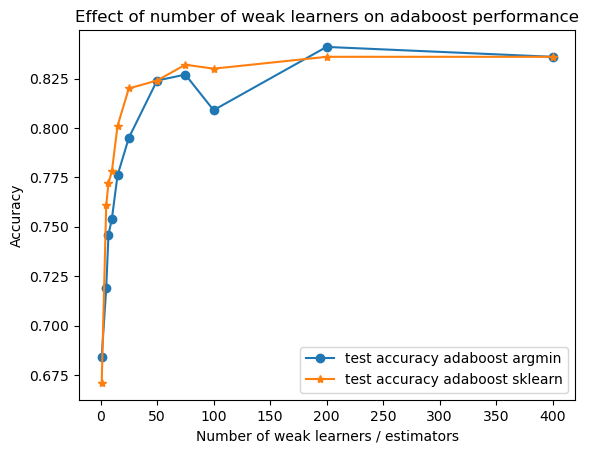

In [586]:
from sklearn.ensemble import AdaBoostClassifier
print("-----------------Dataset 1--------------------")
test_acc = []
test_acc_ = []
n_estimators = [1,5, 7, 10, 15, 25, 50, 75, 100,200,400]
for n_estimator in n_estimators:
    models,alphas = adaboost_argmin(X1_train, y1_train, n_estimator, 1, 0.9, 0.5)
    y1_pred = adaboost_predict(X1_test, models, alphas)
    test_accuracy = accuracy_score(y1_test, y1_pred)
    test_acc.append(test_accuracy)

    # Create the AdaBoostClassifier model
    model = AdaBoostClassifier(n_estimators=n_estimator, random_state=42)
    # Fit the model to the training data
    model.fit(X1_train, y1_train)
    # Evaluate the model on the test data
    score = model.score(X1_test, y1_test)
    test_acc_.append(score)
    
# plot results
plt.plot(n_estimators, test_acc, label = "test accuracy adaboost argmin", marker = 'o')
plt.plot(n_estimators, test_acc_, label = "test accuracy adaboost sklearn", marker = '*')
plt.legend()
plt.xlabel('Number of weak learners / estimators')
plt.ylabel('Accuracy')
plt.title('Effect of number of weak learners on adaboost performance')
plt.show()